In [1]:
import numpy as np
import pandas as pd

rng = np.random.default_rng()

## データ作成

In [2]:
data = []

for i in range(5000):
    x1 = np.random.randint(0, 50) + rng.standard_normal()
    x2 = np.random.randint(10, 20) + rng.standard_normal()
    x3 = np.random.randint(-100, 100) + rng.standard_normal()
    x4 = np.random.randint(-2, 2) + rng.standard_normal()
    x5 = np.random.randint(20, 30) + rng.standard_normal()
    x6 = i

    y = x1**2 + 2 * x2 - 1.5 * x3 + np.sqrt(2) * x4 - 0.3 * x5
    data.append([x1, x2, x3, x4, x5, y])

df = pd.DataFrame(data)
df.columns = ["x1", "x2", "x3", "x4", "x5", "y"]

train, test = df.iloc[:2000], df.iloc[2000:]

## モデルの訓練

In [3]:
from sklearn.ensemble import StackingRegressor
from sklearn.kernel_ridge import KernelRidge
from sklearn.linear_model import Ridge
from sklearn.ensemble import GradientBoostingRegressor

train_X = train[["x1", "x2", "x3", "x4", "x5"]]
train_y = train["y"]

estimators = [
    ("KernelRidge", KernelRidge(alpha=1, degree=2)),
    ("RidgeReg", Ridge()),
]

reg = StackingRegressor(
    estimators=estimators, final_estimator=GradientBoostingRegressor(max_depth=2, n_estimators=50)
)
reg.fit(train_X, train_y)

StackingRegressor(estimators=[('KernelRidge', KernelRidge(degree=2)),
                              ('RidgeReg', Ridge())],
                  final_estimator=GradientBoostingRegressor(max_depth=2,
                                                            n_estimators=50))

## テストデータでの確認

Text(0.5, 0, 'prediction')

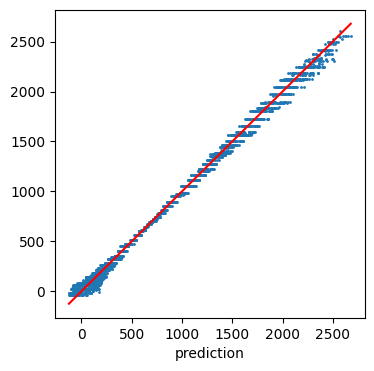

In [4]:
import matplotlib.pyplot as plt

test_X = test[["x1", "x2", "x3", "x4", "x5"]]
test_y = test["y"]
test_y_min, test_y_max = test_y.min(), test_y.max()
pred = reg.predict(test_X)

plt.figure(figsize=(4, 4))
plt.scatter(test_y, pred, s=1)
plt.plot(
    np.linspace(test_y_min, test_y_max, 1000),
    np.linspace(test_y_min, test_y_max, 1000),
    c="red",
)
plt.xlabel("true")
plt.xlabel("prediction")